# Import basic Library to read file

In [173]:
import pandas as pd
import numpy as np

In [174]:
df = pd.read_csv("train_ctrUa4K.csv")

In [175]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [176]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Function to Imput NAN values

In [177]:
def impute_mode(col):
    df[col].fillna(df[col].mode()[0], inplace = True)

In [178]:
def impute_median(col):
    df[col].fillna(df[col].median(), inplace = True)

In [179]:
impute_mode('Gender')

In [180]:
impute_mode('Married')

In [181]:
impute_mode('Dependents')

In [182]:
impute_mode('Self_Employed')

In [183]:
impute_median('LoanAmount')

In [184]:
impute_mode('Loan_Amount_Term')

In [185]:
impute_mode('Credit_History')

In [186]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Encoding the Cat features

In [187]:
gender = pd.get_dummies(df['Gender'], drop_first=False, prefix='Gen')

married = pd.get_dummies(df['Married'], drop_first=False, prefix='Mar')

edu = pd.get_dummies(df['Education'], drop_first=False, prefix = 'Edu')

emp = pd.get_dummies(df['Self_Employed'], drop_first=False, prefix = 'Emp')

cre = pd.get_dummies(df['Credit_History'], drop_first=False, prefix = 'Cre')

loan = pd.get_dummies(df['Loan_Amount_Term'], drop_first=False, prefix = 'Loan')

area = pd.get_dummies(df['Property_Area'], drop_first=False, prefix = 'Area')

In [188]:
final_df = df.drop(['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term', 'Property_Area'], axis = 1)

In [189]:
final_df = pd.concat([final_df,gender, married, edu, emp, cre, loan, area], axis = 1)

In [190]:
final_df

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,Gen_Female,Gen_Male,Mar_No,Mar_Yes,...,Loan_84.0,Loan_120.0,Loan_180.0,Loan_240.0,Loan_300.0,Loan_360.0,Loan_480.0,Area_Rural,Area_Semiurban,Area_Urban
0,LP001002,0,5849,0.0,128.0,Y,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
1,LP001003,1,4583,1508.0,128.0,N,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0
2,LP001005,0,3000,0.0,66.0,Y,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
3,LP001006,0,2583,2358.0,120.0,Y,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
4,LP001008,0,6000,0.0,141.0,Y,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2900,0.0,71.0,Y,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
610,LP002979,3+,4106,0.0,40.0,Y,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
611,LP002983,1,8072,240.0,253.0,Y,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
612,LP002984,2,7583,0.0,187.0,Y,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1


In [191]:
final_df['Dependents'].replace('3+','3', inplace=True)

In [192]:
final_df['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [193]:
final_df

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,Gen_Female,Gen_Male,Mar_No,Mar_Yes,...,Loan_84.0,Loan_120.0,Loan_180.0,Loan_240.0,Loan_300.0,Loan_360.0,Loan_480.0,Area_Rural,Area_Semiurban,Area_Urban
0,LP001002,0,5849,0.0,128.0,Y,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
1,LP001003,1,4583,1508.0,128.0,N,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0
2,LP001005,0,3000,0.0,66.0,Y,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
3,LP001006,0,2583,2358.0,120.0,Y,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
4,LP001008,0,6000,0.0,141.0,Y,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2900,0.0,71.0,Y,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
610,LP002979,3,4106,0.0,40.0,Y,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
611,LP002983,1,8072,240.0,253.0,Y,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
612,LP002984,2,7583,0.0,187.0,Y,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1


In [194]:
X = final_df.drop(["Loan_Status","Loan_ID"], axis = 1)

In [195]:
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Gen_Female,Gen_Male,Mar_No,Mar_Yes,Edu_Graduate,Edu_Not Graduate,...,Loan_84.0,Loan_120.0,Loan_180.0,Loan_240.0,Loan_300.0,Loan_360.0,Loan_480.0,Area_Rural,Area_Semiurban,Area_Urban
0,0,5849,0.0,128.0,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,1,4583,1508.0,128.0,0,1,0,1,1,0,...,0,0,0,0,0,1,0,1,0,0
2,0,3000,0.0,66.0,0,1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
3,0,2583,2358.0,120.0,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
4,0,6000,0.0,141.0,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
610,3,4106,0.0,40.0,0,1,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0
611,1,8072,240.0,253.0,0,1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
612,2,7583,0.0,187.0,0,1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1


In [196]:
y = final_df["Loan_Status"]

In [197]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

# Libraries used for modelling / splitting the dataset

In [198]:
from sklearn.model_selection import train_test_split, cross_val_score #Spliting method
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier, BaggingClassifier, VotingClassifier#Ensemble models
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score #Metrics
from category_encoders import LeaveOneOutEncoder #Encoding
from mlxtend.classifier import StackingCVClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_roc_curve


In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

In [200]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [201]:
X_train

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Gen_Female,Gen_Male,Mar_No,Mar_Yes,Edu_Graduate,Edu_Not Graduate,...,Loan_84.0,Loan_120.0,Loan_180.0,Loan_240.0,Loan_300.0,Loan_360.0,Loan_480.0,Area_Rural,Area_Semiurban,Area_Urban
68,3,7100,0.0,125.0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
298,0,5000,2541.0,151.0,1,0,1,0,1,0,...,0,0,0,0,0,0,1,1,0,0
235,1,5500,1260.0,170.0,0,1,0,1,1,0,...,0,0,0,0,0,1,0,1,0,0
469,0,4333,2451.0,110.0,0,1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
307,0,2400,1863.0,104.0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,1,3481,0.0,155.0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
391,3,9504,0.0,275.0,0,1,0,1,1,0,...,0,0,0,0,0,1,0,1,0,0
273,0,2620,2223.0,150.0,0,1,0,1,1,0,...,0,0,0,0,0,1,0,0,1,0
191,0,12000,0.0,164.0,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [202]:
y_train

68     Y
298    N
235    Y
469    N
307    N
      ..
262    N
391    Y
273    Y
191    N
184    Y
Name: Loan_Status, Length: 491, dtype: object

In [203]:
X_test

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Gen_Female,Gen_Male,Mar_No,Mar_Yes,Edu_Graduate,Edu_Not Graduate,...,Loan_84.0,Loan_120.0,Loan_180.0,Loan_240.0,Loan_300.0,Loan_360.0,Loan_480.0,Area_Rural,Area_Semiurban,Area_Urban
375,0,4817,923.0,120.0,0,1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
79,3,3333,2166.0,130.0,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
465,0,6000,0.0,140.0,0,1,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
536,0,6133,3906.0,324.0,0,1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
418,0,1025,2773.0,112.0,0,1,0,1,1,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,0,2130,6666.0,70.0,0,1,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
73,3,4755,0.0,95.0,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
423,1,7250,1667.0,110.0,0,1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
527,1,5285,1430.0,161.0,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0


In [204]:
y_test

375    Y
79     Y
465    Y
536    Y
418    Y
      ..
513    N
73     N
423    N
527    Y
54     N
Name: Loan_Status, Length: 123, dtype: object

# Logistic Regression

In [205]:
lg = LogisticRegression()

lg.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [206]:
train_pred = lg.predict(X_train)

test_pred = lg.predict(X_test)

In [207]:
confusion_matrix(y_train, train_pred)

array([[ 70,  87],
       [  6, 328]], dtype=int64)

In [208]:
accuracy_score(y_train, train_pred)

0.8105906313645621

In [209]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           N       0.92      0.45      0.60       157
           Y       0.79      0.98      0.88       334

    accuracy                           0.81       491
   macro avg       0.86      0.71      0.74       491
weighted avg       0.83      0.81      0.79       491



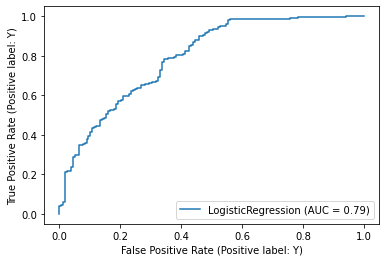

In [210]:
plot_roc_curve(lg,X_train, y_train)

In [211]:
accuracy_score(y_test,test_pred)

0.8373983739837398

# Scaling the data

In [212]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [213]:
ro = RobustScaler()

In [214]:
depen = pd.get_dummies(final_df['Dependents'], drop_first=False, prefix = 'Dep')

In [215]:
scaled = pd.DataFrame(ro.fit_transform(final_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]), index=final_df.index, columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])

In [216]:
final_df = pd.concat([final_df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Dependents'],axis = 1),scaled, depen], axis = 1)

In [217]:
final_df

,Loan_ID,Loan_Status,Gen_Female,Gen_Male,Mar_No,Mar_Yes,Edu_Graduate,Edu_Not Graduate,Emp_No,Emp_Yes,...,Area_Rural,Area_Semiurban,Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Dep_0,Dep_1,Dep_2,Dep_3
0,LP001002,Y,0,1,1,0,1,0,1,0,...,0,0,1,0.698029,-0.517358,0.000000,1,0,0,0
1,LP001003,N,0,1,0,1,1,0,1,0,...,1,0,0,0.264096,0.139079,0.000000,0,1,0,0
2,LP001005,Y,0,1,0,1,1,0,0,1,...,0,0,1,-0.278492,-0.517358,-0.961240,1,0,0,0
3,LP001006,Y,0,1,0,1,0,1,1,0,...,0,0,1,-0.421422,0.509087,-0.124031,1,0,0,0
4,LP001008,Y,0,1,1,0,1,0,1,0,...,0,0,1,0.749786,-0.517358,0.201550,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Y,1,0,1,0,1,0,1,0,...,1,0,0,-0.312768,-0.517358,-0.883721,1,0,0,0
610,LP002979,Y,0,1,0,1,1,0,1,0,...,1,0,0,0.100600,-0.517358,-1.364341,0,0,0,1
611,LP002983,Y,0,1,0,1,1,0,1,0,...,0,0,1,1.459983,-0.412885,1.937984,0,1,0,0
612,LP002984,Y,0,1,0,1,1,0,1,0,...,0,0,1,1.292374,-0.517358,0.914729,0,0,1,0


In [218]:
X = final_df.drop(["Loan_ID", "Loan_Status"], axis= 1)

In [219]:
y = final_df["Loan_Status"]

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

# Log Regression after scaling 

In [221]:
lg = LogisticRegression()

lg.fit(X_train, y_train)

LogisticRegression()

In [222]:
train_pred = lg.predict(X_train)

test_pred = lg.predict(X_test)

In [223]:
accuracy_score(y_train, train_pred)

0.8187372708757638

In [224]:
accuracy_score(y_test, test_pred)

0.7967479674796748

In [225]:
def model_fit(alg, X_train, X_test, y_train, y_test, if_cv = True, cv_folds = 5):
    alg.fit(X_train, y_train)
    
    #Cross-val
    if if_cv:
        cv_score = cross_val_score(alg, X_train, y_train, cv = cv_folds, scoring = 'f1_macro')
    
    prediction = alg.predict(X_test)
    
    if if_cv:
        print('CV report: Mean - %.3g | Std - %.3g | Min - %.3g, Max- %.3g' %(np.mean(cv_score),
                                                                              np.std(cv_score), 
                                                                              np.min(cv_score), 
                                                                              np.max(cv_score)))
    print("Accuracy: ", accuracy_score(y_test, prediction))
    print('-'*100)
    
    cm = pd.DataFrame(confusion_matrix(y_test, prediction))
    print(cm)


# KNN Finding best k value

In [226]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
model_fit(knn, X_train, X_test, y_train, y_test)

CV report: Mean - 0.624 | Std - 0.0404 | Min - 0.568, Max- 0.689
Accuracy:  0.7154471544715447
----------------------------------------------------------------------------------------------------
    0   1
0  13  30
1   5  75


In [227]:
def KNN_predicts(train_x, test_x, train_y, test_y, scaler, neighbours, metric ="manhattan", weights = 'uniform'):
    train_scaled = scaler.fit_transform(train_x)
    test_scaled = scaler.transform(test_x)
    
    KNN = KNeighborsClassifier(n_neighbors = neighbours, metric = metric, weights = weights, n_jobs = -1)
    KNN.fit(train_scaled, train_y)
    prediction= KNN.predict(test_scaled)
    
    print("accuracy: ", accuracy_score(test_y, prediction))
    #print("accuracy: ", accuracy_score(train_x, prediction))
    print("-"*100)
    return KNN

In [228]:
KNN_predicts(X_train, X_test, y_train, y_test, StandardScaler(),1)

accuracy:  0.6747967479674797
----------------------------------------------------------------------------------------------------


KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=1)

In [229]:
for k in range(1, 11):
    print("Accuracy score on KNN using n_neighbors = {0}". format(k), end = ' ')
    KNN_predicts(X_train, X_test, y_train, y_test, StandardScaler(), k)

Accuracy score on KNN using n_neighbors = 1 accuracy:  0.6747967479674797
----------------------------------------------------------------------------------------------------
Accuracy score on KNN using n_neighbors = 2 accuracy:  0.6829268292682927
----------------------------------------------------------------------------------------------------
Accuracy score on KNN using n_neighbors = 3 accuracy:  0.7642276422764228
----------------------------------------------------------------------------------------------------
Accuracy score on KNN using n_neighbors = 4 accuracy:  0.7479674796747967
----------------------------------------------------------------------------------------------------
Accuracy score on KNN using n_neighbors = 5 accuracy:  0.7723577235772358
----------------------------------------------------------------------------------------------------
Accuracy score on KNN using n_neighbors = 6 accuracy:  0.7642276422764228
---------------------------------------------------

In [230]:
k = 5 
for metric in ['euclidean', 'minkowski', 'manhattan', 'chebyshev']:
    print("Accuracy score on KNN using {} metric and {} neighbors :" .format(metric, k), end = ' ')
    KNN_predicts(X_train, X_test, y_train, y_test, StandardScaler(), k, metric)

Accuracy score on KNN using euclidean metric and 5 neighbors : accuracy:  0.7723577235772358
----------------------------------------------------------------------------------------------------
Accuracy score on KNN using minkowski metric and 5 neighbors : accuracy:  0.7723577235772358
----------------------------------------------------------------------------------------------------
Accuracy score on KNN using manhattan metric and 5 neighbors : accuracy:  0.7723577235772358
----------------------------------------------------------------------------------------------------
Accuracy score on KNN using chebyshev metric and 5 neighbors : accuracy:  0.7723577235772358
----------------------------------------------------------------------------------------------------


In [231]:
for weight in ['uniform', 'distance']:
    print("Accuracy score on KNN using neighbors = {0}:" .format(weight), end = ' ')
    KNN_predicts(X_train, X_test, y_train, y_test, StandardScaler(), 5, metric = 'manhattan', weights = weight)

Accuracy score on KNN using neighbors = uniform: accuracy:  0.7723577235772358
----------------------------------------------------------------------------------------------------
Accuracy score on KNN using neighbors = distance: accuracy:  0.7479674796747967
----------------------------------------------------------------------------------------------------


In [232]:
KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', weights = 'uniform', n_jobs = -1)

In [233]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_jobs=-1)

In [234]:
KNN.score(X_train,y_train)

0.814663951120163

# n_neighbors = 5, metric = 'euclidean', weights = 'uniform', n_jobs = -1

In [235]:
KNN.score(X_test,y_test)

0.7154471544715447

# Decision tree approach resulted in overfitting issue 

In [236]:
dc = DecisionTreeClassifier()
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [237]:
dc.score(X_train,y_train)

1.0

In [238]:
dc.score(X_test,y_test)

0.6910569105691057

# ensemble methods tried RF, ADAboost, Gradientboost, BaggingClassifier, CATBoost, XGBoost, LGBMClassifier

In [239]:
rc = RandomForestClassifier()
rc.fit(X_train,y_train)

RandomForestClassifier()

In [240]:
rc.score(X_train,y_train)

1.0

In [241]:
rc.score(X_test,y_test)

0.7886178861788617

In [242]:
ad = AdaBoostClassifier()
ad.fit(X_train,y_train)

AdaBoostClassifier()

In [243]:
ad.score(X_train,y_train)

0.8472505091649695

In [244]:
ad.score(X_test,y_test)

0.7967479674796748

In [245]:
GB = GradientBoostingClassifier()
GB.fit(X_train,y_train)

GradientBoostingClassifier()

In [246]:
GB.score(X_train,y_train)

0.8920570264765784

In [247]:
GB.score(X_test,y_test)

0.7804878048780488

In [248]:
bg = BaggingClassifier()
bg.fit(X_train,y_train)

BaggingClassifier()

In [249]:
bg.score(X_train,y_train)

0.9775967413441955

In [250]:
bg.score(X_test,y_test)

0.7479674796747967

In [251]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

[21:34:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [252]:
xgb.score(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


1.0

In [253]:
xgb.score(X_test,y_test)

C:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.7560975609756098

In [254]:
lg = LGBMClassifier()
lg.fit(X_train,y_train)

LGBMClassifier()

In [255]:
lg.score(X_test,y_test)

0.7804878048780488

In [256]:
lg.score(X_train,y_train)

0.9959266802443992

In [257]:
cat = CatBoostClassifier()
cat.fit(X_train,y_train)

Learning rate set to 0.007604
0:	learn: 0.6894328	total: 1.08ms	remaining: 1.07s
1:	learn: 0.6851304	total: 3.46ms	remaining: 1.73s
2:	learn: 0.6810239	total: 5.69ms	remaining: 1.89s
3:	learn: 0.6773169	total: 8.49ms	remaining: 2.11s
4:	learn: 0.6732084	total: 10.5ms	remaining: 2.08s
5:	learn: 0.6698055	total: 11.3ms	remaining: 1.87s
6:	learn: 0.6662591	total: 13.1ms	remaining: 1.86s
7:	learn: 0.6623076	total: 15.3ms	remaining: 1.9s
8:	learn: 0.6588974	total: 16.3ms	remaining: 1.79s
9:	learn: 0.6554384	total: 17.9ms	remaining: 1.77s
10:	learn: 0.6517897	total: 19.5ms	remaining: 1.75s
11:	learn: 0.6486424	total: 20.7ms	remaining: 1.71s
12:	learn: 0.6448608	total: 22.4ms	remaining: 1.7s
13:	learn: 0.6413727	total: 24.1ms	remaining: 1.7s
14:	learn: 0.6379005	total: 25.8ms	remaining: 1.7s
15:	learn: 0.6342533	total: 27.4ms	remaining: 1.69s
16:	learn: 0.6311518	total: 29.1ms	remaining: 1.68s
17:	learn: 0.6280931	total: 30.9ms	remaining: 1.68s
18:	learn: 0.6250540	total: 32.6ms	remaining: 1.

177:	learn: 0.4211552	total: 299ms	remaining: 1.38s
178:	learn: 0.4208287	total: 300ms	remaining: 1.38s
179:	learn: 0.4202653	total: 302ms	remaining: 1.38s
180:	learn: 0.4197047	total: 304ms	remaining: 1.38s
181:	learn: 0.4192541	total: 306ms	remaining: 1.38s
182:	learn: 0.4190666	total: 307ms	remaining: 1.37s
183:	learn: 0.4186517	total: 309ms	remaining: 1.37s
184:	learn: 0.4181729	total: 310ms	remaining: 1.37s
185:	learn: 0.4175220	total: 312ms	remaining: 1.36s
186:	learn: 0.4172660	total: 313ms	remaining: 1.36s
187:	learn: 0.4168016	total: 314ms	remaining: 1.36s
188:	learn: 0.4162392	total: 316ms	remaining: 1.35s
189:	learn: 0.4160292	total: 317ms	remaining: 1.35s
190:	learn: 0.4156702	total: 319ms	remaining: 1.35s
191:	learn: 0.4152884	total: 320ms	remaining: 1.35s
192:	learn: 0.4149432	total: 322ms	remaining: 1.34s
193:	learn: 0.4145996	total: 323ms	remaining: 1.34s
194:	learn: 0.4138920	total: 325ms	remaining: 1.34s
195:	learn: 0.4137032	total: 325ms	remaining: 1.33s
196:	learn: 

373:	learn: 0.3557947	total: 767ms	remaining: 1.28s
374:	learn: 0.3555030	total: 769ms	remaining: 1.28s
375:	learn: 0.3554083	total: 773ms	remaining: 1.28s
376:	learn: 0.3553026	total: 775ms	remaining: 1.28s
377:	learn: 0.3549639	total: 779ms	remaining: 1.28s
378:	learn: 0.3546662	total: 781ms	remaining: 1.28s
379:	learn: 0.3544385	total: 784ms	remaining: 1.28s
380:	learn: 0.3542961	total: 787ms	remaining: 1.28s
381:	learn: 0.3541864	total: 789ms	remaining: 1.27s
382:	learn: 0.3538842	total: 790ms	remaining: 1.27s
383:	learn: 0.3534371	total: 792ms	remaining: 1.27s
384:	learn: 0.3531867	total: 794ms	remaining: 1.27s
385:	learn: 0.3528456	total: 796ms	remaining: 1.27s
386:	learn: 0.3527207	total: 798ms	remaining: 1.26s
387:	learn: 0.3523628	total: 799ms	remaining: 1.26s
388:	learn: 0.3521033	total: 801ms	remaining: 1.26s
389:	learn: 0.3516832	total: 802ms	remaining: 1.25s
390:	learn: 0.3515394	total: 804ms	remaining: 1.25s
391:	learn: 0.3513134	total: 805ms	remaining: 1.25s
392:	learn: 

536:	learn: 0.3205302	total: 1.07s	remaining: 920ms
537:	learn: 0.3203487	total: 1.07s	remaining: 918ms
538:	learn: 0.3201090	total: 1.07s	remaining: 916ms
539:	learn: 0.3199605	total: 1.07s	remaining: 915ms
540:	learn: 0.3197552	total: 1.08s	remaining: 913ms
541:	learn: 0.3195208	total: 1.08s	remaining: 911ms
542:	learn: 0.3194105	total: 1.08s	remaining: 909ms
543:	learn: 0.3192194	total: 1.08s	remaining: 907ms
544:	learn: 0.3190153	total: 1.08s	remaining: 905ms
545:	learn: 0.3187127	total: 1.08s	remaining: 903ms
546:	learn: 0.3184062	total: 1.09s	remaining: 901ms
547:	learn: 0.3181802	total: 1.09s	remaining: 900ms
548:	learn: 0.3180381	total: 1.09s	remaining: 898ms
549:	learn: 0.3179370	total: 1.09s	remaining: 896ms
550:	learn: 0.3177559	total: 1.1s	remaining: 894ms
551:	learn: 0.3176349	total: 1.1s	remaining: 892ms
552:	learn: 0.3175412	total: 1.1s	remaining: 891ms
553:	learn: 0.3174546	total: 1.1s	remaining: 889ms
554:	learn: 0.3172628	total: 1.1s	remaining: 887ms
555:	learn: 0.317

713:	learn: 0.2883901	total: 1.37s	remaining: 550ms
714:	learn: 0.2881758	total: 1.37s	remaining: 547ms
715:	learn: 0.2879991	total: 1.38s	remaining: 545ms
716:	learn: 0.2879506	total: 1.38s	remaining: 543ms
717:	learn: 0.2874571	total: 1.38s	remaining: 541ms
718:	learn: 0.2873196	total: 1.38s	remaining: 539ms
719:	learn: 0.2871195	total: 1.38s	remaining: 537ms
720:	learn: 0.2870135	total: 1.38s	remaining: 535ms
721:	learn: 0.2868950	total: 1.38s	remaining: 533ms
722:	learn: 0.2868549	total: 1.38s	remaining: 531ms
723:	learn: 0.2867191	total: 1.39s	remaining: 529ms
724:	learn: 0.2866133	total: 1.39s	remaining: 526ms
725:	learn: 0.2864830	total: 1.39s	remaining: 524ms
726:	learn: 0.2864143	total: 1.39s	remaining: 522ms
727:	learn: 0.2861728	total: 1.39s	remaining: 521ms
728:	learn: 0.2860222	total: 1.4s	remaining: 519ms
729:	learn: 0.2858171	total: 1.4s	remaining: 517ms
730:	learn: 0.2856754	total: 1.4s	remaining: 515ms
731:	learn: 0.2855330	total: 1.4s	remaining: 513ms
732:	learn: 0.28

946:	learn: 0.2543371	total: 1.84s	remaining: 103ms
947:	learn: 0.2541965	total: 1.84s	remaining: 101ms
948:	learn: 0.2541256	total: 1.84s	remaining: 99ms
949:	learn: 0.2540610	total: 1.84s	remaining: 97.1ms
950:	learn: 0.2540108	total: 1.85s	remaining: 95.3ms
951:	learn: 0.2537668	total: 1.85s	remaining: 93.5ms
952:	learn: 0.2534575	total: 1.86s	remaining: 91.6ms
953:	learn: 0.2533871	total: 1.86s	remaining: 89.7ms
954:	learn: 0.2533469	total: 1.86s	remaining: 87.7ms
955:	learn: 0.2530042	total: 1.86s	remaining: 85.8ms
956:	learn: 0.2527876	total: 1.87s	remaining: 83.8ms
957:	learn: 0.2526720	total: 1.87s	remaining: 81.9ms
958:	learn: 0.2525848	total: 1.87s	remaining: 80ms
959:	learn: 0.2523877	total: 1.87s	remaining: 78.1ms
960:	learn: 0.2521239	total: 1.88s	remaining: 76.1ms
961:	learn: 0.2520397	total: 1.88s	remaining: 74.2ms
962:	learn: 0.2518751	total: 1.88s	remaining: 72.3ms
963:	learn: 0.2517197	total: 1.88s	remaining: 70.4ms
964:	learn: 0.2515860	total: 1.89s	remaining: 68.4ms

In [258]:
cat.score(X_train,y_train)

0.8961303462321792

In [259]:
cat.score(X_test,y_test)

0.7967479674796748

# Stacking the best algorithms based on test accuracy

In [260]:
cl_1 = LGBMClassifier()
cl_2 = XGBClassifier(use_label_encoder=False)
cl_3 = RandomForestClassifier()
cl_4 = CatBoostClassifier()

meta = LogisticRegression()

stack = StackingCVClassifier(classifiers=[cl_1, cl_2, cl_3, cl_4], meta_classifier = meta, n_jobs = -1, verbose = 3)

In [261]:
#y_train
y_train = y_train.replace({'N': 0, 'Y': 1})

In [262]:
y_test = y_test.replace({'N': 0, 'Y': 1})

In [263]:
y_train

228    1
141    1
182    1
383    1
514    0
      ..
337    1
509    1
416    0
368    1
21     1
Name: Loan_Status, Length: 491, dtype: int64

In [264]:
stack.fit(X_train,y_train)

Fitting 4 classifiers...
Fitting classifier1: lgbmclassifier (1/4)
LGBMClassifier()


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting classifier2: xgbclassifier (2/4)
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None)


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting classifier3: randomforestclassifier (3/4)
RandomForestClassifier(verbose=1)


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting classifier4: catboostclassifier (4/4)


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    4.0s finished


[21:35:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


Learning rate set to 0.007604
0:	learn: 0.6894328	total: 2.72ms	remaining: 2.71s
1:	learn: 0.6851304	total: 8.15ms	remaining: 4.07s
2:	learn: 0.6810239	total: 10.2ms	remaining: 3.38s
3:	learn: 0.6773169	total: 12.3ms	remaining: 3.07s
4:	learn: 0.6732084	total: 15.1ms	remaining: 3.01s
5:	learn: 0.6698055	total: 16ms	remaining: 2.65s
6:	learn: 0.6662591	total: 17.2ms	remaining: 2.44s
7:	learn: 0.6623076	total: 19.1ms	remaining: 2.37s
8:	learn: 0.6588974	total: 20.1ms	remaining: 2.22s
9:	learn: 0.6554384	total: 22.3ms	remaining: 2.2s
10:	learn: 0.6517897	total: 25.2ms	remaining: 2.26s
11:	learn: 0.6486424	total: 26.8ms	remaining: 2.2s
12:	learn: 0.6448608	total: 28.9ms	remaining: 2.2s
13:	learn: 0.6413727	total: 31.1ms	remaining: 2.19s
14:	learn: 0.6379005	total: 34ms	remaining: 2.23s
15:	learn: 0.6342533	total: 36.1ms	remaining: 2.22s
16:	learn: 0.6311518	total: 38.2ms	remaining: 2.21s
17:	learn: 0.6280931	total: 40.3ms	remaining: 2.2s
18:	learn: 0.6250540	total: 42.6ms	remaining: 2.2s
1

163:	learn: 0.4294926	total: 448ms	remaining: 2.29s
164:	learn: 0.4290042	total: 451ms	remaining: 2.28s
165:	learn: 0.4282530	total: 453ms	remaining: 2.28s
166:	learn: 0.4271721	total: 457ms	remaining: 2.28s
167:	learn: 0.4269054	total: 458ms	remaining: 2.27s
168:	learn: 0.4264431	total: 460ms	remaining: 2.26s
169:	learn: 0.4259300	total: 461ms	remaining: 2.25s
170:	learn: 0.4249312	total: 463ms	remaining: 2.25s
171:	learn: 0.4244113	total: 465ms	remaining: 2.24s
172:	learn: 0.4241325	total: 469ms	remaining: 2.24s
173:	learn: 0.4237210	total: 473ms	remaining: 2.24s
174:	learn: 0.4232290	total: 475ms	remaining: 2.24s
175:	learn: 0.4225472	total: 477ms	remaining: 2.23s
176:	learn: 0.4218200	total: 479ms	remaining: 2.23s
177:	learn: 0.4211552	total: 483ms	remaining: 2.23s
178:	learn: 0.4208287	total: 486ms	remaining: 2.23s
179:	learn: 0.4202653	total: 488ms	remaining: 2.22s
180:	learn: 0.4197047	total: 491ms	remaining: 2.22s
181:	learn: 0.4192541	total: 493ms	remaining: 2.22s
182:	learn: 

379:	learn: 0.3544385	total: 1.06s	remaining: 1.73s
380:	learn: 0.3542961	total: 1.07s	remaining: 1.73s
381:	learn: 0.3541864	total: 1.07s	remaining: 1.73s
382:	learn: 0.3538842	total: 1.07s	remaining: 1.73s
383:	learn: 0.3534371	total: 1.07s	remaining: 1.72s
384:	learn: 0.3531867	total: 1.08s	remaining: 1.72s
385:	learn: 0.3528456	total: 1.08s	remaining: 1.72s
386:	learn: 0.3527207	total: 1.08s	remaining: 1.71s
387:	learn: 0.3523628	total: 1.08s	remaining: 1.71s
388:	learn: 0.3521033	total: 1.09s	remaining: 1.71s
389:	learn: 0.3516832	total: 1.09s	remaining: 1.71s
390:	learn: 0.3515394	total: 1.09s	remaining: 1.71s
391:	learn: 0.3513134	total: 1.1s	remaining: 1.7s
392:	learn: 0.3510627	total: 1.1s	remaining: 1.7s
393:	learn: 0.3508898	total: 1.1s	remaining: 1.69s
394:	learn: 0.3507024	total: 1.1s	remaining: 1.69s
395:	learn: 0.3506854	total: 1.11s	remaining: 1.69s
396:	learn: 0.3503673	total: 1.11s	remaining: 1.69s
397:	learn: 0.3502006	total: 1.11s	remaining: 1.68s
398:	learn: 0.3498

549:	learn: 0.3179370	total: 1.52s	remaining: 1.24s
550:	learn: 0.3177559	total: 1.52s	remaining: 1.24s
551:	learn: 0.3176349	total: 1.52s	remaining: 1.24s
552:	learn: 0.3175412	total: 1.53s	remaining: 1.24s
553:	learn: 0.3174546	total: 1.53s	remaining: 1.23s
554:	learn: 0.3172628	total: 1.53s	remaining: 1.23s
555:	learn: 0.3170498	total: 1.53s	remaining: 1.23s
556:	learn: 0.3166856	total: 1.54s	remaining: 1.22s
557:	learn: 0.3164685	total: 1.54s	remaining: 1.22s
558:	learn: 0.3162844	total: 1.54s	remaining: 1.22s
559:	learn: 0.3159750	total: 1.55s	remaining: 1.22s
560:	learn: 0.3157927	total: 1.55s	remaining: 1.21s
561:	learn: 0.3155818	total: 1.55s	remaining: 1.21s
562:	learn: 0.3154318	total: 1.56s	remaining: 1.21s
563:	learn: 0.3152907	total: 1.56s	remaining: 1.21s
564:	learn: 0.3152253	total: 1.56s	remaining: 1.2s
565:	learn: 0.3150018	total: 1.56s	remaining: 1.2s
566:	learn: 0.3148486	total: 1.57s	remaining: 1.2s
567:	learn: 0.3145724	total: 1.57s	remaining: 1.2s
568:	learn: 0.31

741:	learn: 0.2837808	total: 2.15s	remaining: 749ms
742:	learn: 0.2835633	total: 2.15s	remaining: 745ms
743:	learn: 0.2835024	total: 2.16s	remaining: 743ms
744:	learn: 0.2834091	total: 2.16s	remaining: 740ms
745:	learn: 0.2832134	total: 2.16s	remaining: 736ms
746:	learn: 0.2829390	total: 2.17s	remaining: 733ms
747:	learn: 0.2828003	total: 2.17s	remaining: 730ms
748:	learn: 0.2826993	total: 2.17s	remaining: 727ms
749:	learn: 0.2825570	total: 2.17s	remaining: 724ms
750:	learn: 0.2822071	total: 2.17s	remaining: 721ms
751:	learn: 0.2821355	total: 2.18s	remaining: 718ms
752:	learn: 0.2819496	total: 2.18s	remaining: 715ms
753:	learn: 0.2818208	total: 2.18s	remaining: 711ms
754:	learn: 0.2817180	total: 2.18s	remaining: 708ms
755:	learn: 0.2815889	total: 2.18s	remaining: 705ms
756:	learn: 0.2813674	total: 2.19s	remaining: 702ms
757:	learn: 0.2812077	total: 2.19s	remaining: 699ms
758:	learn: 0.2811217	total: 2.19s	remaining: 696ms
759:	learn: 0.2810244	total: 2.19s	remaining: 693ms
760:	learn: 

928:	learn: 0.2562812	total: 2.61s	remaining: 200ms
929:	learn: 0.2561593	total: 2.62s	remaining: 197ms
930:	learn: 0.2559598	total: 2.62s	remaining: 194ms
931:	learn: 0.2559289	total: 2.62s	remaining: 191ms
932:	learn: 0.2558837	total: 2.62s	remaining: 188ms
933:	learn: 0.2556683	total: 2.63s	remaining: 186ms
934:	learn: 0.2555961	total: 2.63s	remaining: 183ms
935:	learn: 0.2555484	total: 2.63s	remaining: 180ms
936:	learn: 0.2553752	total: 2.63s	remaining: 177ms
937:	learn: 0.2551639	total: 2.64s	remaining: 174ms
938:	learn: 0.2550794	total: 2.64s	remaining: 171ms
939:	learn: 0.2549366	total: 2.64s	remaining: 169ms
940:	learn: 0.2548548	total: 2.64s	remaining: 166ms
941:	learn: 0.2547894	total: 2.65s	remaining: 163ms
942:	learn: 0.2547296	total: 2.65s	remaining: 160ms
943:	learn: 0.2545622	total: 2.65s	remaining: 157ms
944:	learn: 0.2545172	total: 2.66s	remaining: 155ms
945:	learn: 0.2544632	total: 2.66s	remaining: 152ms
946:	learn: 0.2543371	total: 2.66s	remaining: 149ms
947:	learn: 

StackingCVClassifier(classifiers=[LGBMClassifier(),
                                  XGBClassifier(base_score=None, booster=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                gamma=None, gpu_id=None,
                                                importance_type='gain',
                                                interaction_constraints=None,
                                                learning_rate=None,
                                                max_delta_step=None,
                                                max_depth=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                        

In [265]:
stack.score(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.9959266802443992

In [266]:
stack.score(X_test,y_test)

C:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.7804878048780488

# SVM Classifier

In [267]:
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score 

In [268]:
svm1 = SVC()

In [269]:
svm1.fit(X_train,y_train)

SVC()

In [271]:
svm1.score(X_test,y_test)

0.7723577235772358

In [272]:
svm1.score(X_train,y_train)

0.8207739307535642

In [273]:
train_accuracy = []

In [274]:
k = np.arange(1,21)

In [275]:
k

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [277]:
for i in k:
    select = SelectKBest(f_classif,k = i)
    x_train_new = select.fit_transform(X_train,y_train)
    svm1.fit(X_train, y_train)
    train_accuracy.append(svm1.score(X_train,y_train))

In [278]:
import matplotlib

import matplotlib.pyplot as plt

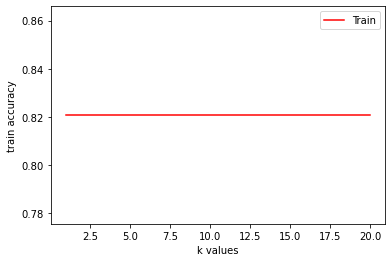

In [279]:
plt.plot(k,train_accuracy, color = 'red', label = 'Train')
plt.xlabel("k values")
plt.ylabel("train accuracy")
plt.legend()
plt.show()

# Top Feature list based out of SVM

In [281]:
select_top = SelectKBest(f_classif,k=5)
x_train_new = select_top.fit_transform(X_train,y_train)
x_test_new = select_top.fit_transform(X_test,y_test)

print("Top Train Features", X_train.columns.values[select_top.get_support()])
print("Top Test Features", X_test.columns.values[select_top.get_support()])
svm1.fit(X_train,y_train)
train_accuracy.append(svm1.score(X_train,y_train))

Top Train Features ['Emp_No' 'Emp_Yes' 'Cre_0.0' 'Cre_1.0' 'Loan_360.0']
Top Test Features ['Emp_No' 'Emp_Yes' 'Cre_0.0' 'Cre_1.0' 'Loan_360.0']


C:\Users\User\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [10 11 12 13] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\User\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


# Parameter tunning for SVM

In [292]:
c= [1.0, 0.25, 0.5, 0.75]

In [293]:
kernels = ['linear', 'rbf']

In [294]:
gammas = ["auto", 0.01, 0.001, 1]

In [295]:
from sklearn.model_selection import GridSearchCV
grid_svm = GridSearchCV(estimator = svm1, param_grid = dict(kernel = kernels, C = c, gamma = gammas), cv = 5)

In [297]:
grid_svm.fit(X_train, y_train)
print("the best hyperparameter :", grid_svm.best_estimator_)

the best hyperparameter : SVC(gamma='auto', kernel='linear')


In [298]:
svc_model = SVC(gamma = "auto", kernel = 'linear')

In [299]:
svc_model.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [300]:
print('train accuracy :', svc_model.score(X_train, y_train))
print('test accuracy :', svc_model.score(X_test, y_test))

train accuracy : 0.8167006109979633
test accuracy : 0.7967479674796748


In [301]:
from yellowbrick.classifier import confusion_matrix

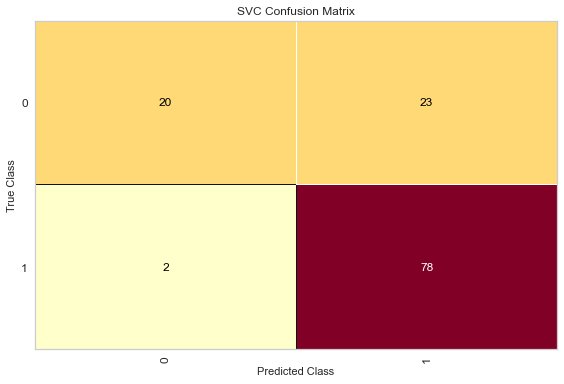

ConfusionMatrix(ax=<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                cmap=<matplotlib.colors.ListedColormap object at 0x0000023988E0D430>,
                estimator=SVC(gamma='auto', kernel='linear'))

In [303]:
confusion_matrix(svc_model,X_train,y_train,X_test, y_test)